In [3]:
import pandas as pd

# Load the dataset (update the file name as needed)
data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')  # Use encoding if errors occur
##data = pd.read_csv('OnlineRetail.csv')  
print(data.head())
print(data.shape)
print(data.columns)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [5]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate A/B test groups (A = control, B = variant)
data['Group'] = np.random.choice(['A', 'B'], size=len(data), p=[0.5, 0.5])
print(data['Group'].value_counts())  # Check the split

Group
B    271412
A    270497
Name: count, dtype: int64


In [9]:
# Simulate conversions (e.g., 10% chance of purchase for Group A, 12% for Group B)
data['Conversion'] = np.where(
    data['Group'] == 'A',
    np.random.choice([0, 1], size=len(data), p=[0.90, 0.10]),  # 10% conversion for A
    np.random.choice([0, 1], size=len(data), p=[0.88, 0.12])   # 12% conversion for B
)
print(data['Conversion'].value_counts())  # 1 = purchase, 0 = no purchase

Conversion
0    482310
1     59599
Name: count, dtype: int64


In [11]:
data.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [15]:
data = data.sample(n=10000, random_state=42)
print(data.shape)

(10000, 10)


In [17]:
print(data[['Group', 'Conversion']].head())
print(data.groupby('Group')['Conversion'].mean())  # Quick peek at conversion rates

       Group  Conversion
209268     B           0
207108     B           0
167085     A           0
471836     A           0
115865     B           0
Group
A    0.099275
B    0.118395
Name: Conversion, dtype: float64


In [ ]:
## A/B Test Hypothesis
# - **Null Hypothesis (H₀)**: The conversion rates of Design A and Design B are the same.
# - **Alternative Hypothesis (H₁)**: Design B has a higher conversion rate than Design A (one-tailed test).

In [ ]:
## Metric
# - **Conversion Rate**: The proportion of interactions that result in a purchase (1 = purchase, 0 = no purchase).
# - Calculated as: mean of the `Conversion` column per group.

In [ ]:
## Significance Level
#- **α = 0.05**: If the p-value from our test is less than 0.05, we reject the null hypothesis and conclude Design B is better.

In [19]:
# Conversion rates by group
conversion_rates = data.groupby('Group')['Conversion'].mean()
print("Conversion Rates:")
print(conversion_rates)

# Number of conversions and total interactions per group
conversions = data.groupby('Group')['Conversion'].sum()
totals = data.groupby('Group')['Conversion'].count()
print("\nConversions and Totals:")
print(pd.DataFrame({'Conversions': conversions, 'Total': totals}))

Conversion Rates:
Group
A    0.099275
B    0.118395
Name: Conversion, dtype: float64

Conversions and Totals:
       Conversions  Total
Group                    
A              493   4966
B              596   5034


In [21]:
# Separate conversions for each group
conversions_A = data[data['Group'] == 'A']['Conversion']
conversions_B = data[data['Group'] == 'B']['Conversion']

In [23]:
from scipy.stats import ttest_ind

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(conversions_B, conversions_A, equal_var=False)

# Since we're doing a one-tailed test (B > A), divide the p-value by 2
p_value_one_tailed = p_value / 2

print("t-statistic:", t_stat)
print("p-value (one-tailed):", p_value_one_tailed)

t-statistic: 3.0715406503519103
p-value (one-tailed): 0.0010676578552591485


In [ ]:
## Statistical Test Results
# - **t-statistic**: 3.0715
# - **p-value (one-tailed)**: 0.00107
# - **Interpretation**:
#   - Since the p-value (0.00107) is less than 0.05, we reject the null hypothesis.
#   - Conclusion: Design B has a statistically significant higher conversion rate than Design A.

In [25]:
# Decision based on p-value
alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis: Design B has a significantly higher conversion rate than Design A.")
else:
    print("Fail to reject the null hypothesis: No significant difference between Design A and Design B.")

Reject the null hypothesis: Design B has a significantly higher conversion rate than Design A.


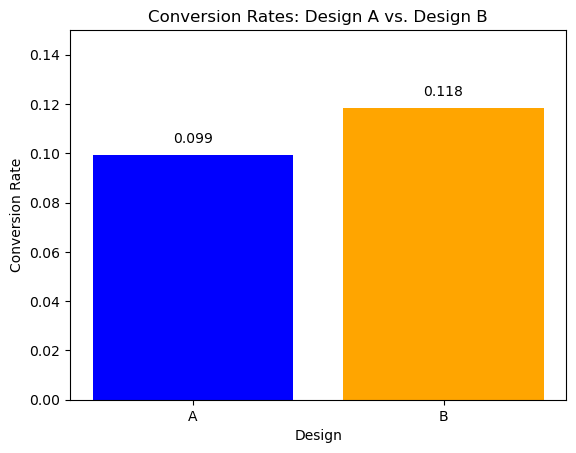

In [27]:
import matplotlib.pyplot as plt

# Plot conversion rates
conversion_rates = data.groupby('Group')['Conversion'].mean()
plt.bar(conversion_rates.index, conversion_rates, color=['blue', 'orange'])
plt.title('Conversion Rates: Design A vs. Design B')
plt.xlabel('Design')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.15)  # Adjust y-axis for better visibility
for i, rate in enumerate(conversion_rates):
    plt.text(i, rate + 0.005, f'{rate:.3f}', ha='center')
plt.show()